# Importing Libraries

In [1]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
from matplotlib.offsetbox import*
import pandas as pd
from colorama import*
from scipy.interpolate import make_interp_spline
import  os
from tabulate import tabulate

font1 = {'family':'serif','color':'black'}

# Calling the File
### File containing the columns with header "Temperature" (Hold the values of stellar temperature in K) & "Radius" (Hold the values of respective planetary radius in Earth Radii).

In [2]:
filename = 'Spectral Type - All.xlsx'   # Path to the file

df = pd.read_excel(filename)       # Read the file through pandas (python package)
temp = df['Temperature']           # Store the values of temperature to the variable "temp"
radius = df['Radius']              # Store the values of radius to the variable "radius"

# Some arrays to hold the calculated values

In [3]:
xlabel = ["O", "B", "A", "F", "G", "K", "M", "L", "T", "Y"]   # Labels of stellar type
rrange = ["0 - 5", "5 - 10", "10 - 15", "15 - 20", "> 20"]    # Ranges of radius of exoplanet

# Array to store the number of exoplanets based on their temperature
c1, c2, c3, c4, c5, c6, c7, c8, c9, c10 = [0,0,0,0,0,0,0,0,0,0] 
temp_range = ["> 30000", "10000 - 30000", "7500 - 10000", "6000 - 7500", "5200 - 6000", "3700 - 5200", "2400 - 3700", \
              "1300 -2400", "700 - 1300", "< 700"]

# Arrays to store the values of radius and the total number of planets that fall in that region defined priorly
b1, b2, b3, b4, b5, b6, b7, b8, b9, b10 = [[], [], [], [], [], [], [], [], [], []]
radius_data_array = [b1, b2, b3, b4, b5, b6, b7, b8, b9, b10]

# Calculate the number of Exoplanets that fall into the given region

In [4]:
for i in range(np.size(temp)):
    
    # Spectral Type O : Temperature > 30000
    if temp[i] > 30000:
        c1 = c1 + 1
        b1.append(radius[i])
    
    # Spectral Type B : Temperature 10000 - 30000
    elif temp[i] > 10000 and temp[i] <= 30000:
        c2 = c2 + 1
        b2.append(radius[i])
    
    # Spectral Type A : Temperature 7500 - 10000
    elif temp[i] > 7500 and temp[i] <= 10000:
        c3 = c3 + 1
        b3.append(radius[i])
    
    # Spectral Type F : Temperature 6000 - 7500
    elif temp[i] > 6000 and temp[i] <= 7500:
        c4 = c4 + 1
        b4.append(radius[i])
    
    # Spectral Type G : Temperature 5200 - 6000
    elif temp[i] > 5200 and temp[i] <= 6000:
        c5 = c5 + 1
        b5.append(radius[i])
    
    # Spectral Type K : Temperature 3700 - 5200
    elif temp[i] > 3700 and temp[i] <= 5200:
        c6 = c6 + 1
        b6.append(radius[i])
    
    # Spectral Type M : Temperature 2400 - 3700
    elif temp[i] > 2400 and temp[i] <= 3700:
        c7 = c7 + 1
        b7.append(radius[i])
    
    # Spectral Type L : Temperature 1300 - 2400
    elif temp[i] > 1300 and temp[i] <= 2400:
        c8 = c8 + 1
        b8.append(radius[i])
    
    # Spectral Type T : Temperature 700 - 1300
    elif temp[i] > 700 and temp[i] <= 1300:
        c9 = c9 + 1
        b9.append(radius[i])
    
    # Spectral Type Y : Temperature <700
    elif temp[i] <= 700:
        c10 = c10 + 1
        b10.append(radius[i])

# Check for the discripency in number of total data and calculated data

In [5]:
count = np.array([c1, c2, c3, c4, c5, c6, c7, c8, c9, c10])
                 
if sum(count) == np.size(temp):
    print("True")
    print("Sum = ",sum(count), "\nNo. of Rows = ",np.size(temp))
else:
    print("Please check for the blank cells in excel file")
    print("Sum = ",sum(count), "\nNo. of Rows = ",np.size(temp), "\nDifference = ", abs(np.size(temp) - sum(count)))
    
ocrate = count*100/np.size(temp)

True
Sum =  3815 
No. of Rows =  3815


# Calculate the number of exoplanets that fall into the given radius range for various spectral types of host stars

In [6]:
counter_array = np.zeros([10,5], dtype = int) # Array to store the calculated numbers

# Loop that calculates the number of exoplanets in the respective spectral type of host star, 
# which falls into the given radius range
for n in range(np.size(radius_data_array)):
    for m in range(np.size(radius_data_array[n])):
        if radius_data_array[n][m] > 0 and radius_data_array[n][m] <= 5:
            counter_array[n][0] = counter_array[n][0] + 1 
                    
        if radius_data_array[n][m] > 5 and radius_data_array[n][m] <= 10:
            counter_array[n][1] = counter_array[n][1] + 1
        
        if radius_data_array[n][m] > 10 and radius_data_array[n][m] <= 15:
            counter_array[n][2] = counter_array[n][2] + 1
                    
        if radius_data_array[n][m] > 15 and radius_data_array[n][m] <= 20:
            counter_array[n][3] = counter_array[n][3] + 1
                
        if radius_data_array[n][m] > 20:
            counter_array[n][4] = counter_array[n][4] + 1

rad_data = np.transpose(counter_array)

C:\Users\computer\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


# Calculation of Occurrence Rate of exoplanets in given Spectral Type

In [7]:
ocrate_n = ["ocrate1", "ocrate2", "ocrate3", "ocrate4", "ocrate5", "ocrate6", "ocrate7", "ocrate8", "ocrate9", "ocrate10"]

count_n = ["count1", "count2", "count3", "count4", "count5", "count6", "count7", "count8", "count9", "count10"]

for i in range(np.size(ocrate_n)):
    if sum(counter_array[i]) == 0:
        ocrate_n[i] = np.zeros(5)
    else:
        count_n[i] = np.array(counter_array[i])
        ocrate_n[i] = count_n[i]*ocrate[i]/sum(count_n[i])

# Store the values in variable to plot the graph

In [8]:
p1 = np.transpose(ocrate_n)[0]
p2 = np.transpose(ocrate_n)[1]
p3 = np.transpose(ocrate_n)[2]
p4 = np.transpose(ocrate_n)[3]
p5 = np.transpose(ocrate_n)[4]

# Graph 1 : Probability Distribution of Spectral Type

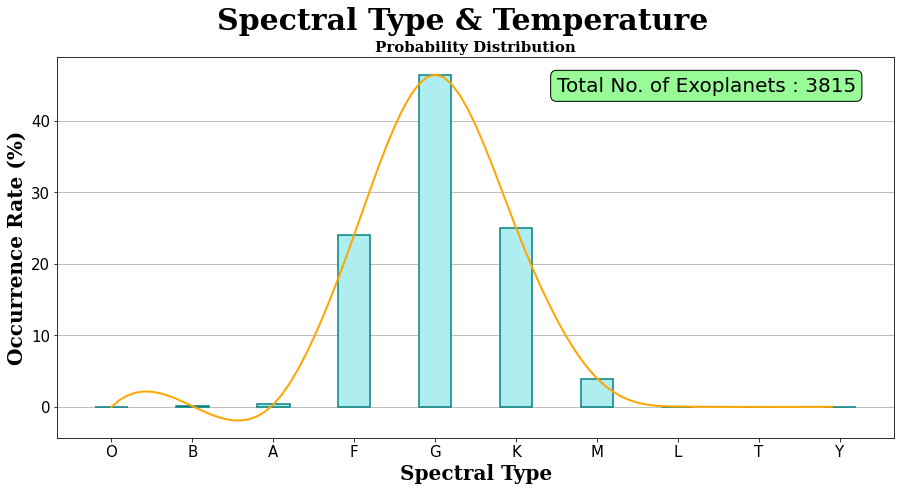

In [9]:
x = np.linspace(0, np.size(xlabel)-1, np.size(xlabel))
X_Y_Spline = make_interp_spline(x, ocrate)

X_ = np.arange(x.min(), x.max(), 0.1)
Y_ = X_Y_Spline(X_)

plt.bar(xlabel,ocrate, zorder = 2, color="paleturquoise", edgecolor='teal', linewidth = 1.5, width = 0.4)
plt.plot(X_, Y_, 'orange', zorder = 3, linewidth = 2)

plt.suptitle("Spectral Type & Temperature", fontdict=font1, weight = "bold",fontsize="30")
plt.title("Probability Distribution", fontdict=font1, weight = "bold",fontsize="15")
plt.xlabel('Spectral Type',fontdict=font1, weight = "bold",fontsize="20")
plt.ylabel('Occurrence Rate (%)',fontdict=font1, weight = "bold",fontsize="20")

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.grid(axis = "y", zorder = 1)

props = dict(boxstyle='round', facecolor='palegreen')

plt.text(5.5, 46.2, "Total No. of Exoplanets : %d"%(np.size(temp)), fontsize=20, verticalalignment='top', bbox=props)

fig=plt.gcf()
fig.set_size_inches(15,7)

# Graph 2 : Probability Distribution of Spectral Types along with planetary Radius

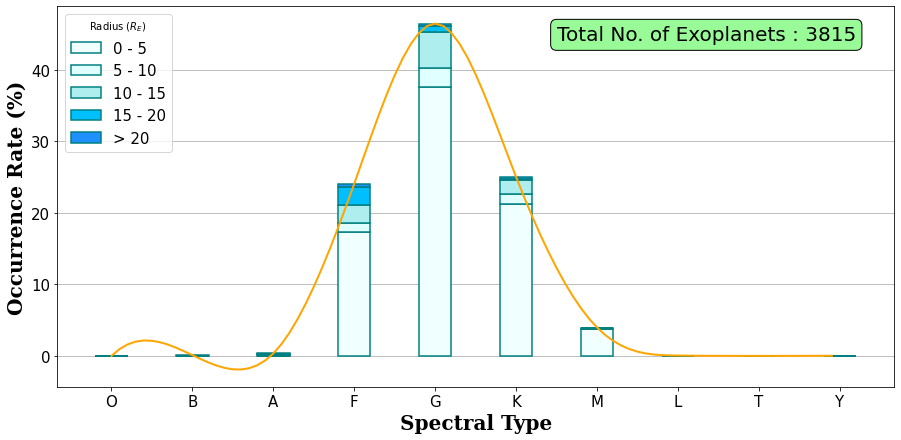

In [10]:
plt.bar(xlabel,p1, zorder = 2, color="azure", edgecolor='teal', linewidth = 1.5, width = 0.4, label = "0 - 5")
plt.bar(xlabel,p2, bottom = p1, zorder = 2, color="lightcyan", edgecolor='teal', linewidth = 1.5, width = 0.4, label = "5 - 10")
plt.bar(xlabel,p3, bottom = p1+p2, zorder = 2, color="paleturquoise", edgecolor='teal', linewidth = 1.5, width = 0.4, label = "10 - 15")
plt.bar(xlabel,p4, bottom = p1+p2+p3, zorder = 2, color="deepskyblue", edgecolor='teal', linewidth = 1.5, width = 0.4, label = "15 - 20")
plt.bar(xlabel,p5, bottom = p1+p2+p3+p4, zorder = 2, color="dodgerblue", edgecolor='teal', linewidth = 1.5, width = 0.4, label = "> 20")

plt.plot(X_, Y_, 'orange', zorder = 3, linewidth = 2)

#plt.suptitle("Spectral Type & Temperature", fontdict=font1, weight = "bold",fontsize="30")
#plt.title("Probability Distribution", fontdict=font1, weight = "bold",fontsize="15")
plt.xlabel('Spectral Type',fontdict=font1, weight = "bold",fontsize="20")
plt.ylabel('Occurrence Rate (%)',fontdict=font1, weight = "bold",fontsize="20")

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.grid(axis = "y", zorder = 1)

plt.legend(loc ="upper left", title = 'Radius ($R_E$)', fontsize=15)
plt.rcParams['legend.title_fontsize'] = '18'

#plt.ylim(0,35)

props = dict(boxstyle='round', facecolor='palegreen')
plt.text(5.5, 46.2, "Total No. of Exoplanets : %d"%(np.size(temp)), fontsize=20, verticalalignment='top', bbox=props)

fig=plt.gcf()
fig.set_size_inches(15,7)

fig.savefig(os.path.join('Spectral_Type_All.jpeg'), format='jpeg', dpi=600, bbox_inches = 'tight')

# Output Data

In [11]:
mydata = [np.transpose(xlabel), np.transpose(temp_range),np.round(ocrate,2), np.size(temp)*ocrate/100,rad_data[0], \
          rad_data[1], rad_data[2], rad_data[3], rad_data[4]]

with open("Spectral Type - All.txt", "w") as f:
    print("Total number of exoplanets : %d"%(np.size(temp)), file = f)
    print(" ",file = f)
    print(tabulate(np.transpose(mydata), headers = ["Spectral Type", "Temperature (K)", "Occurrence Rate (%)", \
                                                "# of Exoplanets", "0 - 5", "5 - 10", "10 - 15", "15 - 20", "> 20"], \
                                                tablefmt="simple", numalign = "center", stralign = "center"), file = f)
    print(" ", file = f)
    print(" ", file = f)
    print("* Data was taken on 24th February, 2022 from NASA Exoplanet Archive", file = f)
    print("* Last 5 columns show the number of exoplanets in different radius ranges", file = f)
    print("* Unit of radius is in Earth Radii", file = f)

with open("Spectral Type - All.txt", "r") as data:
    print(data.read())

Total number of exoplanets : 3815
 
 Spectral Type    Temperature (K)    Occurrence Rate (%)    # of Exoplanets    0 - 5    5 - 10    10 - 15    15 - 20    > 20
---------------  -----------------  ---------------------  -----------------  -------  --------  ---------  ---------  ------
       O              > 30000                 0                    0             0        0          0          0        0
       B           10000 - 30000             0.1                   4             2        0          0          0        2
       A           7500 - 10000             0.34                  13             1        1          1          6        4
       F            6000 - 7500             24.09                 919           659       48        100        96        16
       G            5200 - 6000             46.45                1772          1435       98        192        35        12
       K            3700 - 5200             24.98                 953           812       53    